In [1]:
import pandas as pd
import altair as alt
import numpy as np

import sqlite3 as sql

import json

# Use to handle large amount of data
# alt.data_transformers.enable('json')

In [2]:
# Machine learning model
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Data sets used
These are the data sets used in the outline for the examples code.

In [18]:
cars_url = "https://github.com/byuidatascience/data4missing/raw/master/data-raw/mtcars_missing/mtcars_missing.json" # this gets the cars data from this url
car_db = pd.read_json(cars_url) # uses pandas read_json command to open the data set in pandas format

con = sql.connect("lahmansbaseballdb.sqlite") # allows you to us the sql data set

# Machine Learning data set
dw_ml = pd.read_csv("https://github.com/byuidatascience/data4dwellings/raw/master/data-raw/dwellings_ml/dwellings_ml.csv")


# Line chat 
how to get a line chat to show up in alt air

# SQL

### SQL Template


In [ ]:

dataframe_name = pd.read_sql_query("""SELECT
                                    FROM
                                    """,
                                    database_name)


### Explaing SQL

'SELECT' - Saying what data you want to pull

'*' - Pulls all tables

'FROM' - Which table you want to pull from

'fielding' - Table you are pulling from

'LIMIT 5' - only show '5' rows

con - sql database

In [4]:
df = pd.read_sql_query("""SELECT * 
                        FROM fielding 
                        LIMIT 5""", con)
df

,ID,playerID,yearID,stint,teamID,team_ID,lgID,POS,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR
0,1,abercda01,1871,1,TRO,8,NA,SS,1,1,24,1,3,2,0,None,None,None,None,None
1,2,addybo01,1871,1,RC1,7,NA,2B,22,22,606,67,72,42,5,None,None,None,None,None
2,3,addybo01,1871,1,RC1,7,NA,SS,3,3,96,8,14,7,0,None,None,None,None,None
3,4,allisar01,1871,1,CL1,3,NA,2B,2,0,18,1,4,0,0,None,None,None,None,None
4,5,allisar01,1871,1,CL1,3,NA,OF,29,29,729,51,3,7,1,None,None,None,None,None


### Creating New Dataframe

When creating a new dataframe query the data you need and set it to a new variable

The LIMIT will effect the dataframe

In [7]:
sql_dataframe_0 = pd.read_sql_query("""SELECT teamID
                                FROM Teams
                                LIMIT 5
                                """,
                                con)

sql_dataframe_0

,teamID
0,BS1
1,CH1
2,CL1
3,FW1
4,NY2


### Finding Avgerage

'ROUND' - A round function

'cast' - Converts a value to a new datatype

'ORDER BY' - Use to sort the results

'DESC' - Use to order by a descending order

In [15]:
sql_dataframe_2 = pd.read_sql_query("""SELECT playerID, yearID, ROUND(sum((cast(H as real) / ab)), 3) AS "Batting Average" 
                            FROM Batting
                            WHERE ab >= 100
                            GROUP BY playerID
                            ORDER BY "Batting Average" DESC, playerID
                            LIMIT 5
                            """,
                            con)

sql_dataframe_2

,playerID,yearID,Batting Average
0,ansonca01,1871,9.131
1,cobbty01,1905,8.663
2,henderi01,1979,7.376
3,rosepe01,1963,7.152
4,speaktr01,1908,7.104


### SQL to Altair

'SUM' - is a sum function for sql

'AS' - Renaming the column

'WHERE' - Specifying data you want to use

'OR' - standard or function

'GROUP BY' - filtering by a column

In [12]:
sql_dataframe_1 = pd.read_sql_query("""SELECT teamID, SUM(W) AS "Total Games Won"
                            FROM Teams
                            WHERE teamID = "ALT" OR teamID = "BFN"
                            GROUP BY teamID
                            LIMIT 10
                            """,
                            con)

sql_dataframe_1

,teamID,Total Games Won
0,ALT,6
1,BFN,314


#### Chart Creation

Use altair to creat a chart that was created by SQl

In [17]:
sql_chart_0 = (alt.Chart(sql_dataframe_1)
    .encode(
        x= alt.X('teamID'),
        y= alt.Y('Total Games Won'),
        color= 'teamID'
    ).mark_bar())

# Saving the chart as a png
sql_chart_0.save("screenshots/sql_chart_0.png")

sql_chart_0

alt.Chart(...)

# Maching Learning

#### Classification Model

In [19]:
# .columns will show the dataframes columns
dw_ml.columns

Index(['parcel', 'abstrprd', 'livearea', 'finbsmnt', 'basement', 'yrbuilt',
       'totunits', 'stories', 'nocars', 'numbdrm', 'numbaths', 'sprice',
       'deduct', 'netprice', 'tasp', 'smonth', 'syear', 'condition_AVG',
       'condition_Excel', 'condition_Fair', 'condition_Good',
       'condition_VGood', 'quality_A', 'quality_B', 'quality_C', 'quality_D',
       'quality_X', 'gartype_Att', 'gartype_Att/Det', 'gartype_CP',
       'gartype_Det', 'gartype_None', 'gartype_att/CP', 'gartype_det/CP',
       'arcstyle_BI-LEVEL', 'arcstyle_CONVERSIONS', 'arcstyle_END UNIT',
       'arcstyle_MIDDLE UNIT', 'arcstyle_ONE AND HALF-STORY',
       'arcstyle_ONE-STORY', 'arcstyle_SPLIT LEVEL', 'arcstyle_THREE-STORY',
       'arcstyle_TRI-LEVEL', 'arcstyle_TRI-LEVEL WITH BASEMENT',
       'arcstyle_TWO AND HALF-STORY', 'arcstyle_TWO-STORY', 'qualified_Q',
       'qualified_U', 'status_I', 'status_V', 'before1980'],
      dtype='object')

In [20]:
# Create our filters for the model

x = dw_ml.filter(['gartype_Att', 'gartype_Att/Det', 'gartype_CP',
        'gartype_Det', 'gartype_None', 'gartype_att/CP', 'gartype_det/CP',
        'stories', 'arcstyle_SPLIT LEVEL', 'numbdrm', 'numbaths', 'totunits',
        'stories', 'nocars', 'abstrprd', 'livearea', 'finbsmnt', 'basement',
        'condition_Excel', 'condition_Fair', 'condition_Good',
       'condition_VGood'])

In [21]:
# Create target value
y = dw_ml['before1980']

##### Model

test_size - amount we want to test

random_state - a random number, acts like a seed

In [22]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 29430)

In [23]:
# create the model
classifier = DecisionTreeClassifier()

# train the model
classifier.fit(x_train, y_train)

# make predictions
y_predictions = classifier.predict(x_test)

# test how accurate predictions are
metrics.accuracy_score(y_test, y_predictions)

0.901803898748909

#### Justify Model

In [25]:
# showing how much each feature is contrubuting to model
feature_df = pd.DataFrame({'feature':x.columns, 'importance':classifier.feature_importances_})

feature_df.sort_values(by='importance', ascending=False).head(10)

,feature,importance
15,livearea,0.256196
12,stories,0.230087
0,gartype_Att,0.125690
14,abstrprd,0.098197
17,basement,0.076491
10,numbaths,0.051056
16,finbsmnt,0.048887
20,condition_Good,0.038137
9,numbdrm,0.035603
13,nocars,0.024133


#### Quality of Model


C:\Users\Srwig\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


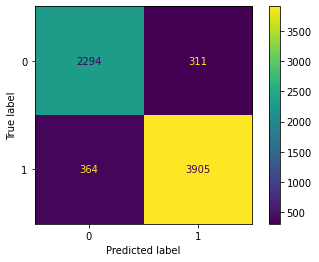

In [27]:
metrics.plot_confusion_matrix(classifier, x_test, y_test)

##### Report

In [28]:
print(metrics.classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2605
           1       0.93      0.91      0.92      4269

    accuracy                           0.90      6874
   macro avg       0.89      0.90      0.90      6874
weighted avg       0.90      0.90      0.90      6874



##### Accuracy

In [29]:
# type of metric 
# how many I got right by the total numbers of tries

(2297 + 3912) / (2297 + 3912 + 357 + 308)

0.9032586558044806

In [30]:
x_test.shape

(6874, 22)

In [31]:
(2297 + 3912 + 357 + 308)

6874

#### Recall

# Markdown Notes

#### Printing tables to MD

Use the to_markdown() functions

In [8]:
print(sql_dataframe_0.to_markdown())

|    | teamID   |
|---:|:---------|
|  0 | BS1      |
|  1 | CH1      |
|  2 | CL1      |
|  3 | FW1      |
|  4 | NY2      |
